This particular Jupyter notebook aims to provide a clustering algorithm for a dataset regarding stocks in the Moroccan Stock Market. The dataset is downloaded from Kaggle. It provides stock values for 75 companies in different dates. It aims to cluster dates from each of these companies to be able to provide a clustering of dates for the stock market for all companies based upon their index. 

We start off by importing the most commonly used Python libraries for Machine Learning
Pandas to store, edit, view and manipulate data
Numpy to perform mathematical operations
Pyplot and Seaborn to visualize data

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We store the data csv file as a Pandas dataframe

In [277]:
df = pd.read_csv('stocks.csv')

It is best to start off by gaining a brief overview of what the data you are working with looks like

In [278]:
df.head(10)

,date,Addoha,AFMA,Afric Indus,Afriquia Gaz,Agma,Alliances,Aluminium Maroc,Aradei Capital,ATLANTASANAD,...,SRM,Ste Boissons,STROC Indus,TAQA Morocco,Timar,Total Maroc,Unimer,Wafa Assur,Zellidja,MASI
0,16/01/2017,54.87,822.5,315.35,NaN,NaN,128.00,1150.0,NaN,49.00,...,284.00,2350.0,56.99,804.0,276.00,1450.0,NaN,4850.0,122.00,12576.9549
1,17/01/2017,51.50,822.5,315.35,NaN,NaN,128.55,1150.0,NaN,49.40,...,284.00,2300.0,59.00,790.0,292.55,1402.0,NaN,4851.0,122.00,12343.0822
2,18/01/2017,52.00,823.0,320.00,NaN,NaN,130.00,1150.0,NaN,47.86,...,284.00,2300.0,60.50,790.0,292.50,1411.0,NaN,4800.0,122.00,12379.0624
3,19/01/2017,52.00,805.1,300.00,NaN,NaN,131.45,1180.0,NaN,49.90,...,283.85,2350.0,54.46,795.0,275.00,1478.0,NaN,4840.0,122.00,12425.0963
4,20/01/2017,53.00,830.0,295.00,NaN,2460.0,131.00,1150.0,NaN,49.00,...,283.85,2350.0,56.39,810.0,259.05,1499.0,NaN,4800.0,129.30,12592.5336
5,23/01/2017,52.70,830.0,295.00,NaN,2460.0,129.50,1218.0,NaN,49.05,...,280.00,2350.0,53.30,805.0,260.00,1500.0,NaN,4800.0,137.05,12500.0500
6,24/01/2017,51.10,840.0,295.00,2690.0,2460.0,128.00,1218.0,NaN,49.44,...,279.00,2350.0,54.04,804.8,260.00,1525.0,NaN,4800.0,137.05,12484.2272
7,25/01/2017,51.00,840.0,295.00,2690.0,2499.0,124.90,1291.0,NaN,48.99,...,277.00,2350.0,57.10,804.8,260.00,1569.0,NaN,4800.0,137.05,12521.4071
8,26/01/2017,50.50,840.0,295.00,2690.0,2465.0,119.15,1291.0,NaN,48.00,...,277.00,2300.0,54.03,805.0,275.00,1530.0,NaN,4900.0,137.05,12430.7352
9,27/01/2017,50.56,840.0,295.00,2650.0,2465.0,124.00,1299.0,NaN,48.60,...,277.00,2300.0,55.36,810.0,275.00,1530.0,NaN,4945.0,140.00,12507.9939


Extract the number of rows and columns in the dataset.
The rows represent the individual players we are going to analyze to create the clusters and the columns represent the number of features we have to work with

In [279]:
df.shape

(1244, 76)

This method is used to extract the data type of each feature
As we can see, we have one object feature and the rest are numbers

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1244 non-null   object 
 1   Addoha            1244 non-null   float64
 2   AFMA              1244 non-null   float64
 3   Afric Indus       1234 non-null   float64
 4   Afriquia Gaz      1231 non-null   float64
 5   Agma              1220 non-null   float64
 6   Alliances         1244 non-null   float64
 7   Aluminium Maroc   1238 non-null   float64
 8   Aradei Capital    274 non-null    float64
 9   ATLANTASANAD      1242 non-null   float64
 10  Attijariwafa      1244 non-null   float64
 11  Auto Hall         1242 non-null   float64
 12  Auto Nejma        1226 non-null   float64
 13  BALIMA            1216 non-null   float64
 14  BCP               1244 non-null   float64
 15  BMCI              1238 non-null   float64
 16  Cartier Saada     1236 non-null   float64


This method provides mathematical information about the numeric feature columns. The most important numbers to consider here are the mean and standard deviation as this shows where the data is centered and how much it varies. 

In [281]:
df.describe()

,Addoha,AFMA,Afric Indus,Afriquia Gaz,Agma,Alliances,Aluminium Maroc,Aradei Capital,ATLANTASANAD,Attijariwafa,...,SRM,Ste Boissons,STROC Indus,TAQA Morocco,Timar,Total Maroc,Unimer,Wafa Assur,Zellidja,MASI
count,1244.000000,1244.000000,1234.000000,1231.000000,1220.000000,1244.000000,1238.000000,274.000000,1242.000000,1244.000000,...,1236.000000,1236.000000,1239.000000,1243.000000,1237.000000,1243.000000,1211.000000,1237.000000,1234.000000,1244.000000
mean,18.796495,1044.838424,288.032293,3550.662876,3314.122131,96.496141,1479.093700,394.278102,71.640757,446.481270,...,220.428439,2584.194175,28.425892,911.444087,178.891310,1330.199759,164.333732,4181.130154,118.540891,11721.070611
std,14.864218,107.519069,19.798232,664.123932,575.304838,72.191560,188.166633,10.135592,17.326024,43.362233,...,59.557043,256.746308,15.130113,76.198520,40.843213,313.186228,13.173119,553.169577,34.138039,959.789732
min,5.670000,805.100000,254.100000,2600.000000,2342.000000,26.270000,1150.000000,375.050000,47.150000,318.100000,...,132.000000,1969.000000,10.600000,705.100000,120.500000,790.000000,127.000000,3106.000000,73.120000,8987.885300
25%,8.087500,985.000000,275.000000,2945.000000,2911.000000,39.307500,1316.000000,387.000000,58.890000,425.500000,...,168.300000,2360.000000,14.275000,862.300000,139.500000,1100.000000,160.000000,3700.000000,85.000000,11205.070375
50%,11.390000,1005.000000,283.600000,3525.000000,3182.000000,73.395000,1436.500000,394.500000,68.000000,450.525000,...,211.000000,2590.000000,23.550000,895.000000,177.000000,1260.000000,166.400000,4101.000000,122.000000,11664.490150
75%,25.155000,1065.250000,297.000000,4000.000000,3475.000000,144.262500,1593.750000,400.000000,79.937500,480.000000,...,279.000000,2750.000000,45.005000,951.500000,215.000000,1575.000000,173.800000,4705.000000,149.900000,12395.288475
max,54.870000,1387.000000,353.200000,5550.000000,4800.000000,310.000000,2463.000000,440.000000,136.500000,514.000000,...,364.000000,3300.000000,73.230000,1220.000000,292.550000,1943.000000,180.000000,5379.000000,212.650000,13784.306300


There are a lot of null values in the dataset. To start off, we select the companies with the most null values. We aim to remove any company that did not have a stock price recorded for at least 75% of the time period since normal data cleaning methods may not be sufficient enough to gather accurate data for these.

In [282]:
df.isnull().sum().sort_values(ascending=False).head(10)

SAMIR             1244
Diac Salaf        1244
Aradei Capital     970
Mutandis           478
Immr Invest        334
Nexans Maroc        34
Unimer              33
BALIMA              28
Rebab Company       27
Agma                24
dtype: int64

In [283]:
df.drop(columns=['SAMIR', 'Diac Salaf', 'Aradei Capital', 'Mutandis', 'Immr Invest'], inplace=True)

We drop the date column, since our we wish to cluster based upon stock only on companies and no other feature.

In [284]:
df.drop(columns=['date'], inplace=True)

We fill in the data. We first use interpolation to fill in the missing values, since the standard deviation is not that large for many feature columns and generally stock prices are related to their values from the days before. We then use the mean for the same reason for the values that could not be interpolated. 

In [285]:
df = df.fillna(df.interpolate())

In [286]:
df.isnull().sum().sort_values(ascending=False).head(10)

Unimer           23
BALIMA           18
Rebab Company    17
Maroc Leasing    11
Oulmes            9
Auto Nejma        9
Afriquia Gaz      6
Agma              4
Maghrebail        3
Dari Couspate     3
dtype: int64

In [287]:
df = df.fillna(df.mean())

In [288]:
df.describe()

,Addoha,AFMA,Afric Indus,Afriquia Gaz,Agma,Alliances,Aluminium Maroc,ATLANTASANAD,Attijariwafa,Auto Hall,...,SRM,Ste Boissons,STROC Indus,TAQA Morocco,Timar,Total Maroc,Unimer,Wafa Assur,Zellidja,MASI
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,...,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,18.796495,1044.838424,287.954863,3549.827948,3309.502823,96.496141,1480.061495,71.627709,446.481270,85.314494,...,220.350523,2584.717846,28.384429,911.414791,178.965032,1329.990997,164.353645,4179.062299,118.744361,11721.070611
std,14.864218,107.519069,19.742841,661.619368,571.195424,72.191560,188.382992,17.315468,43.362233,16.179680,...,59.396246,256.249847,15.117955,76.174871,40.769249,313.146800,13.009807,552.672477,34.117614,959.789732
min,5.670000,805.100000,254.100000,2600.000000,2342.000000,26.270000,1150.000000,47.150000,318.100000,60.000000,...,132.000000,1969.000000,10.600000,705.100000,120.500000,790.000000,127.000000,3106.000000,73.120000,8987.885300
25%,8.087500,985.000000,275.000000,2945.000000,2911.000000,39.307500,1316.000000,58.890000,425.500000,70.500000,...,168.300000,2360.000000,14.240000,862.400000,139.600000,1100.000000,160.000000,3700.000000,85.000000,11205.070375
50%,11.390000,1005.000000,283.325000,3540.000000,3175.000000,73.395000,1437.000000,68.000000,450.525000,83.000000,...,211.000000,2590.000000,23.500000,895.000000,177.000000,1259.000000,166.400000,4100.000000,122.000000,11664.490150
75%,25.155000,1065.250000,297.000000,4000.000000,3475.000000,144.262500,1596.000000,79.912500,480.000000,96.552500,...,279.000000,2750.000000,45.000000,951.250000,215.000000,1575.000000,172.950000,4701.000000,149.900000,12395.288475
max,54.870000,1387.000000,353.200000,5550.000000,4800.000000,310.000000,2463.000000,136.500000,514.000000,116.000000,...,364.000000,3300.000000,73.230000,1220.000000,292.550000,1943.000000,180.000000,5379.000000,212.650000,13784.306300


In [289]:
nums = df.select_dtypes(include=['float64', 'int64'])
nums.columns

Index(['Addoha', 'AFMA', 'Afric Indus', 'Afriquia Gaz', 'Agma', 'Alliances',
       'Aluminium Maroc', 'ATLANTASANAD', 'Attijariwafa', 'Auto Hall',
       'Auto Nejma', 'BALIMA', 'BCP', 'BMCI', 'Cartier Saada', 'CDM',
       'Central.Danone', 'CIH', 'Ciments Maroc', 'CMT', 'Colorado', 'COSUMAR',
       'CTM', 'Dari Couspate', 'Delattre Lev', 'Delta Holding', 'DISWAY',
       'Ennakl', 'EQDOM', 'FENIE BROSSETTE', 'HPS', 'IBMaroc', 'INVOLYS',
       'Jet Contractors', 'LABEL VIE', 'LafargeHolcim', 'Lesieur Cristal',
       'Lydec', 'M2M Group', 'Maghreb Oxygene', 'Maghrebail', 'Managem',
       'Maroc Leasing', 'Maroc Telecom', 'Med Paper', 'Microdata',
       'Nexans Maroc', 'Oulmes', 'PROMOPHARM', 'Rebab Company',
       'Res.Dar Saada', 'Risma', 'S2M', 'Saham Assurance', 'SALAFIN', 'SMI',
       'Stokvis Nord Afr', 'SNEP', 'SODEP', 'Sonasid', 'SRM', 'Ste Boissons',
       'STROC Indus', 'TAQA Morocco', 'Timar', 'Total Maroc', 'Unimer',
       'Wafa Assur', 'Zellidja', 'MASI'],
      d

Not all columns are distributed evenly, as we saw in the describe methods. For example, kdRatio is going to be significantly less than kills at almost any stage. Therefore, to prevent bias in the dataset we use a Standard or MinMax Scaler to reduce the gaps between the feature columns

In [290]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[nums.columns] = scaler.fit_transform(df[nums.columns])

In [291]:
df.describe()

,Addoha,AFMA,Afric Indus,Afriquia Gaz,Agma,Alliances,Aluminium Maroc,ATLANTASANAD,Attijariwafa,Auto Hall,...,SRM,Ste Boissons,STROC Indus,TAQA Morocco,Timar,Total Maroc,Unimer,Wafa Assur,Zellidja,MASI
count,1244.000000,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,...,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03,1.244000e+03
mean,0.000000,7.767991e-16,6.282934e-16,-3.198585e-16,2.741644e-16,-1.827763e-16,-4.569407e-17,3.198585e-16,7.311051e-16,3.198585e-16,...,9.138813e-17,-6.054464e-16,2.741644e-16,6.397169e-16,9.138813e-17,-4.569407e-16,-1.370822e-16,5.026347e-16,3.655525e-16,-1.427940e-15
std,1.000402,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,...,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00
min,-0.883449,-2.230626e+00,-1.715482e+00,-1.436188e+00,-1.694502e+00,-9.731662e-01,-1.752782e+00,-1.414201e+00,-2.961861e+00,-1.565215e+00,...,-1.488075e+00,-2.403769e+00,-1.176851e+00,-2.709526e+00,-1.434624e+00,-1.725096e+00,-2.872346e+00,-1.942369e+00,-1.337805e+00,-2.848837e+00
25%,-0.720744,-5.567616e-01,-6.564442e-01,-9.145307e-01,-6.979452e-01,-7.924976e-01,-8.712436e-01,-7.359219e-01,-4.840551e-01,-9.159916e-01,...,-8.766792e-01,-8.773009e-01,-9.359810e-01,-6.437097e-01,-9.659453e-01,-7.347464e-01,-3.347779e-01,-8.671591e-01,-9.894576e-01,-5.378342e-01
50%,-0.498477,-3.706733e-01,-2.346028e-01,-1.486036e-02,-2.355707e-01,-3.201265e-01,-2.286768e-01,-2.095911e-01,9.329216e-02,-1.431069e-01,...,-1.574895e-01,2.062159e-02,-3.232179e-01,-2.155749e-01,-4.821827e-02,-2.267931e-01,1.573566e-01,-1.431121e-01,9.546237e-02,-5.897460e-02
75%,0.427945,1.899178e-01,4.583319e-01,6.806831e-01,2.898548e-01,6.619274e-01,6.156879e-01,4.786543e-01,7.733045e-01,6.948547e-01,...,9.878245e-01,6.452633e-01,1.099504e+00,5.231545e-01,8.842317e-01,7.827241e-01,6.610254e-01,9.447686e-01,9.135507e-01,7.027466e-01
max,2.427845,3.183614e+00,3.306078e+00,3.024362e+00,2.610484e+00,2.958652e+00,5.219865e+00,3.748000e+00,1.557712e+00,1.897309e+00,...,2.419467e+00,2.792469e+00,2.967571e+00,4.052640e+00,2.787166e+00,1.958364e+00,1.203142e+00,2.172028e+00,2.753516e+00,2.150539e+00


In [292]:
nums.isnull().sum()

Addoha          0
AFMA            0
Afric Indus     0
Afriquia Gaz    0
Agma            0
               ..
Total Maroc     0
Unimer          0
Wafa Assur      0
Zellidja        0
MASI            0
Length: 70, dtype: int64

For K Means Clustering, adding too many feature columns is not ideal as it may bias the data towards the training set. K Means attempts to minimize the distance between points in the same cluster and maximize between different clusters, the problem with having too many dimensions is that the calculations become really sensitive and non-elastic. We try to find the most suitable features, a simple way to do which is the PCA scores. It should be noted that if we had categorical data and wished to use PCA, we would be forced to encode it with a OneHotEncoder instead of a LabelEncoder.

In [293]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(nums)

importance = np.abs(pca.components_[0])
feature_names = nums.columns

feature_scores = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print('Best Features')  
print(feature_scores.head(10))

Best Features
HPS              0.806145
LABEL VIE        0.366648
Afriquia Gaz     0.252237
Agma             0.219481
SMI              0.180456
Dari Couspate    0.142155
Wafa Assur       0.091281
PROMOPHARM       0.080618
Oulmes           0.078856
Microdata        0.067731
dtype: float64


The features we picked to determine the clustering

In [294]:
selected_features = df[feature_scores.head(10).index]
selected_features.head()

,HPS,LABEL VIE,Afriquia Gaz,Agma,SMI,Dari Couspate,Wafa Assur,PROMOPHARM,Oulmes,Microdata
0,-2.337647e-16,-1.338489,0.0,0.000000,0.000000,0.000000,1.214476,0.870826,0.0,-1.430903
1,-1.392146e+00,-1.338489,0.0,0.000000,0.000000,0.000000,1.216286,0.870826,0.0,-1.471880
2,-1.393688e+00,-1.338489,0.0,0.000000,0.861699,0.000000,1.123970,0.870826,0.0,-1.426481
3,-1.393174e+00,-1.338489,0.0,0.000000,0.902143,-2.228741,1.196375,0.870826,0.0,-1.460383
4,-1.393174e+00,-1.338489,0.0,-1.487835,0.902143,-2.289206,1.123970,0.806213,0.0,-1.437094


For a K Means Clustering algorithm, Inertia is defined as the distance between a point and its center. Therefore, we wish to minimize the inertia. However, we may have too many clusters and the inertia may be low, but it is less useful to work with in this context, ideally you would want to have players grouped in clusters with that of similar ability, however if you have too many clusters then it may be difficult to find people in the ability level you wish for. There are two factors that could help you determine how many clusters are best, the elbow method and silhouette scores. For the elbow method, pick the point where the intertia seems to level off, while a higher silhouette score is ideal.

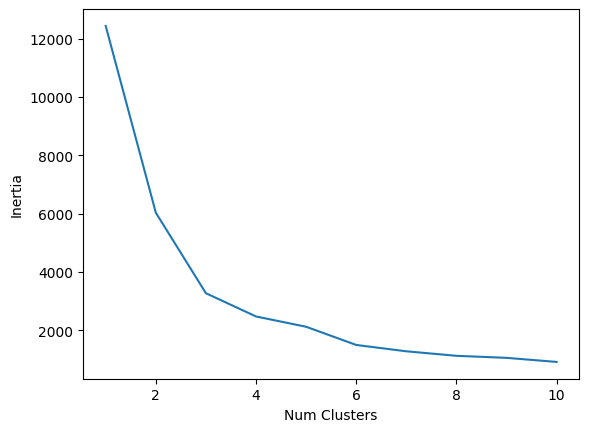

In [295]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=27)
    kmeans.fit(selected_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.show()

[]

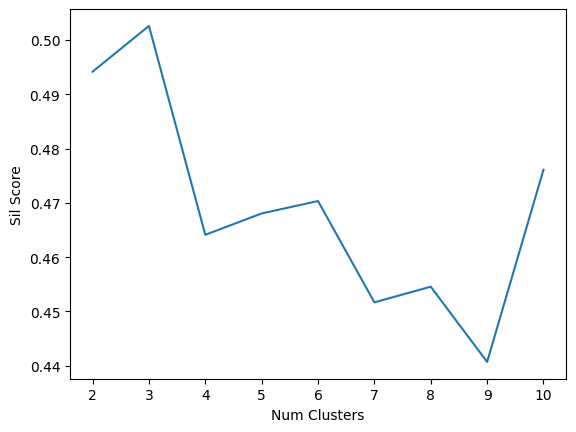

In [296]:
from sklearn.metrics import silhouette_score

silhouettes = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=27)
    labels = kmeans.fit_predict(selected_features)
    score = silhouette_score(selected_features, labels)
    silhouettes.append(score)

plt.plot(range(2,11), silhouettes)
plt.xlabel('Num Clusters')
plt.ylabel('Sil Score')
plt.plot()

We pick 3 clusters for creating the algorithm. Lets create it using sklearn's KMeans function

In [297]:
kmeans = KMeans(n_clusters=3, random_state=27)
kmeans.fit(selected_features)

KMeans(n_clusters=3, random_state=27)

Lets see how the created clusters are distributed

In [298]:
df['cluster'] = kmeans.labels_

In [299]:
df['cluster'].value_counts()

cluster
0    592
2    377
1    275
Name: count, dtype: int64

We can visualize the clusters in a 2D array with a TSNE function. 

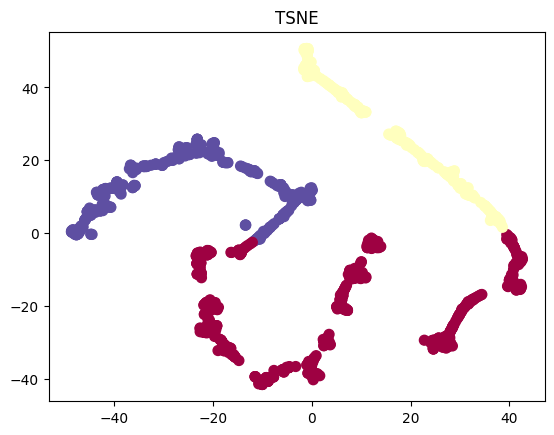

In [300]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=27)
X_tsne = tsne.fit_transform(selected_features)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_, cmap='Spectral', s=50)
plt.title('TSNE')
plt.show()

We can also visualize how the clusters were created. With the following lines of code, we store the clusters' mathematical properties and use their mean and median to see how the features are spread across each player type.

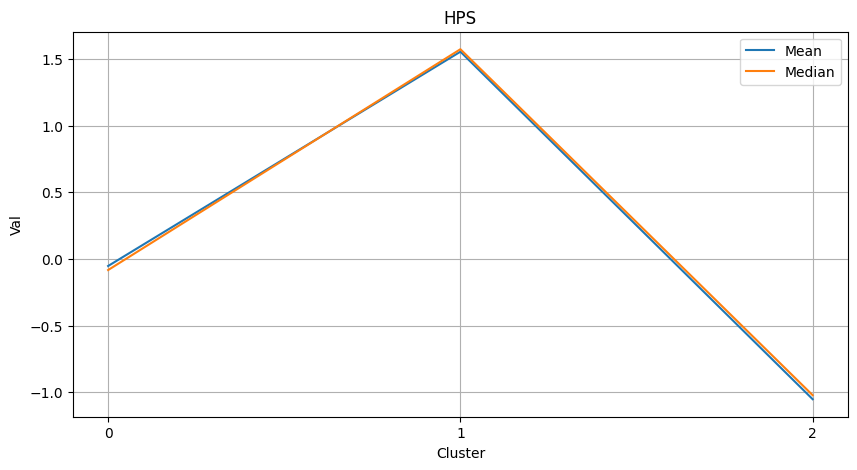

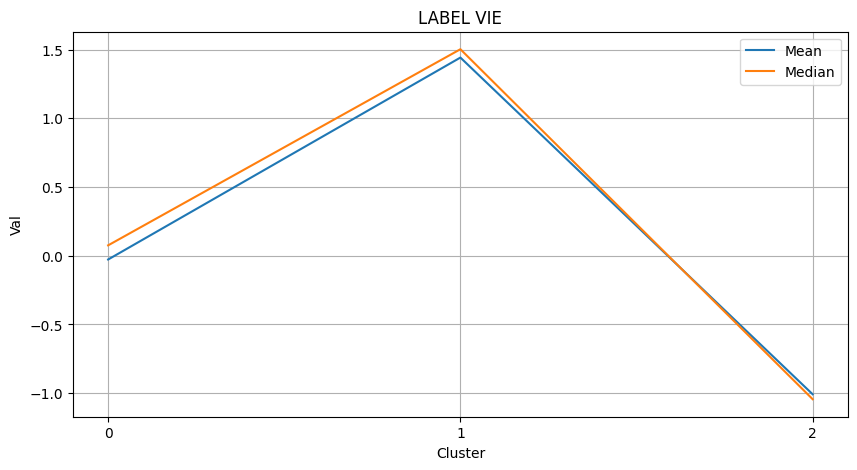

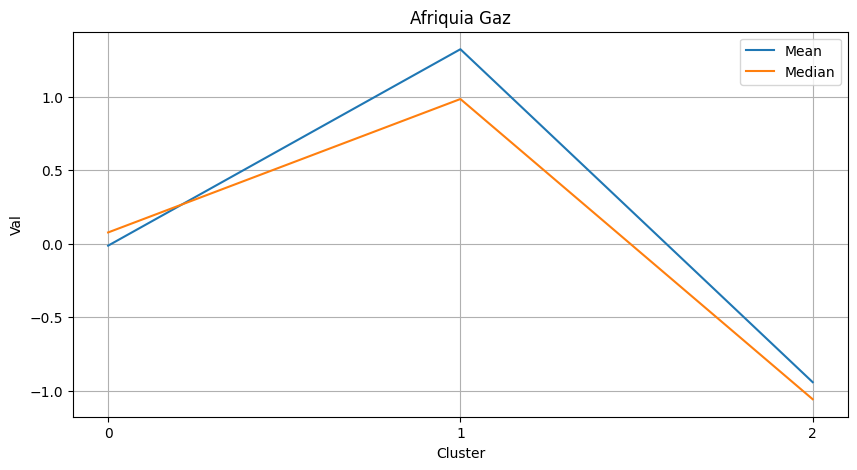

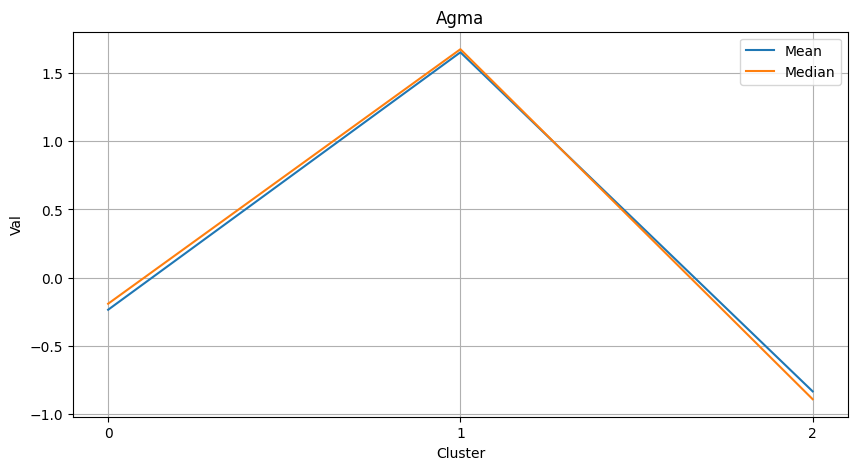

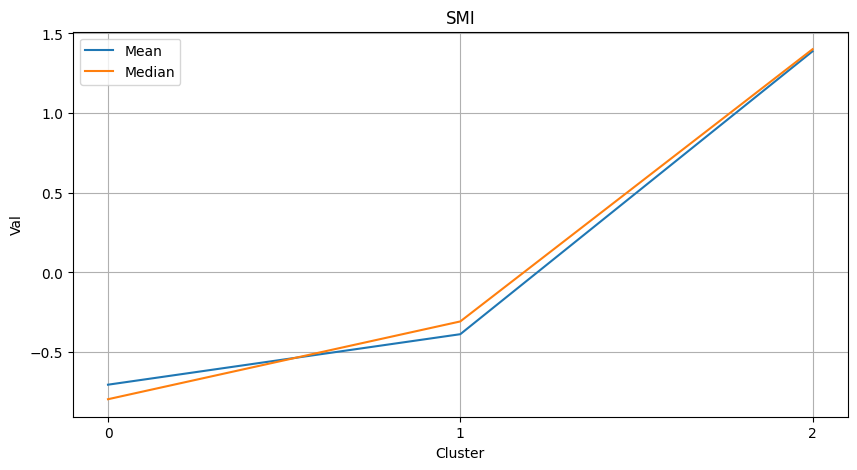

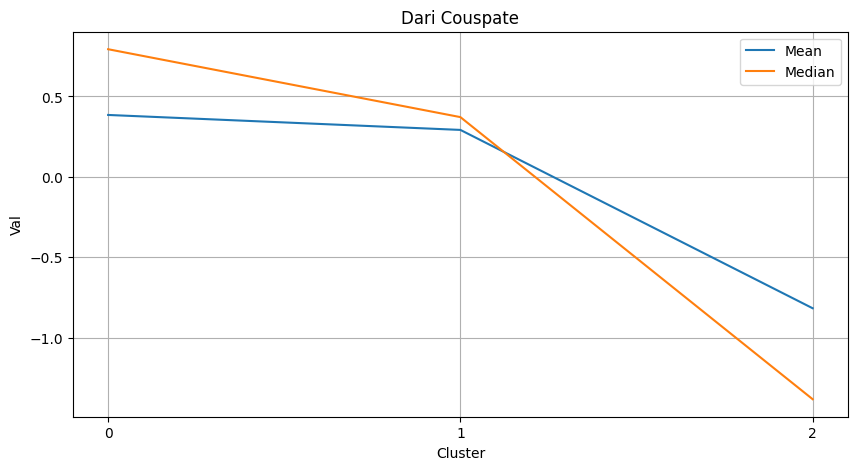

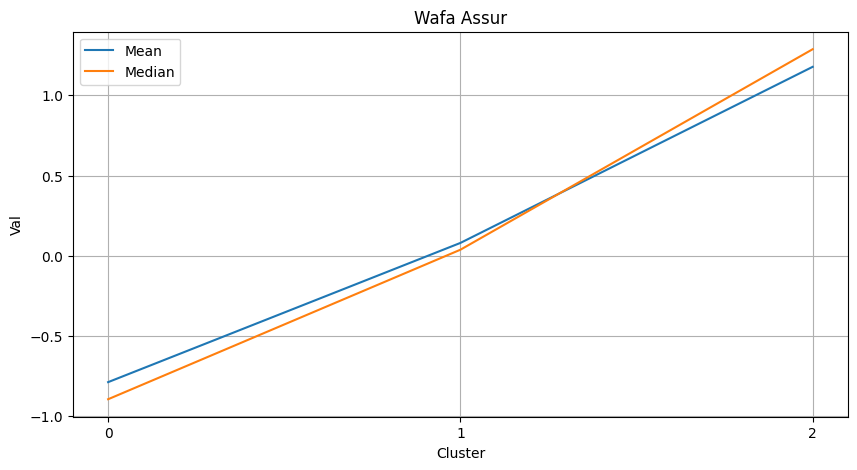

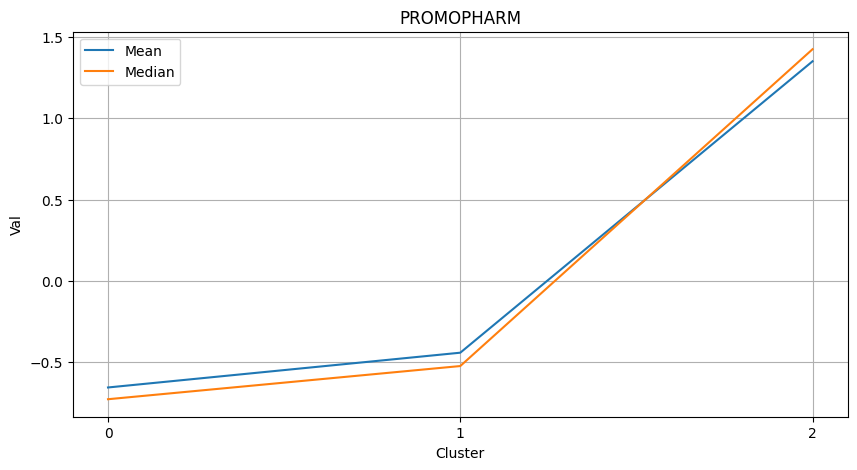

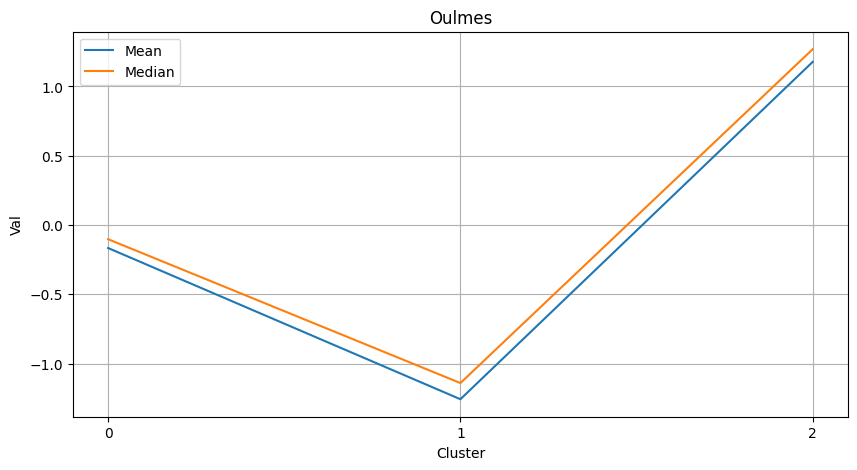

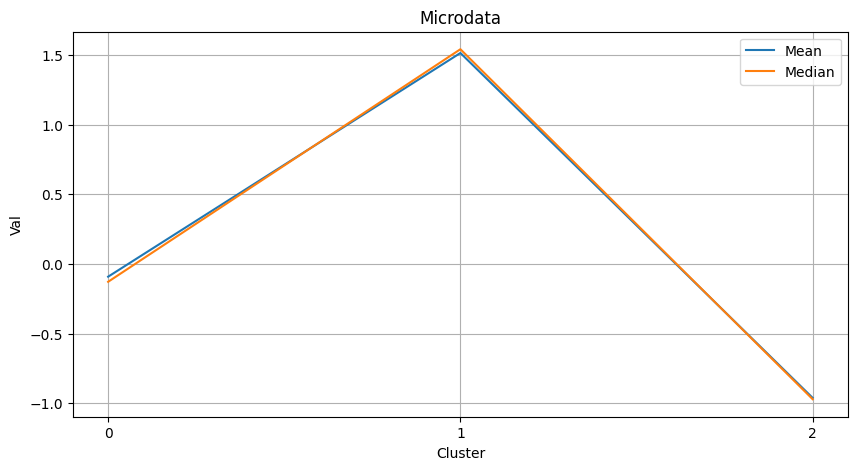

In [301]:
clusters = []

for i in range(3):
    cluster_info = df[df['cluster'] == i]
    stats = cluster_info.describe().transpose()
    clusters.append(stats)

for f in selected_features:
    plt.figure(figsize=(10, 5))
    means = [stats.loc[f, 'mean'] for stats in clusters]
    plt.plot(range(3), means, label='Mean')
    medians = [stats.loc[f, '50%'] for stats in clusters]
    plt.plot(range(3), medians, label='Median')
    plt.title(f)
    plt.xlabel('Cluster')
    plt.ylabel('Val')
    plt.xticks(range(3))
    plt.legend()
    plt.grid(True)
    plt.show()
